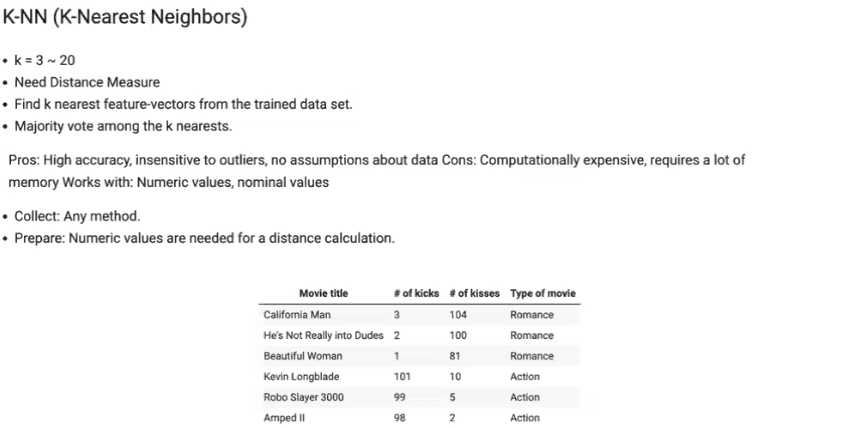

In [1]:
import pandas as pd
movie = list([['California Man', 3, 104, 'Romance'],
              ["He's Not Really into Dudes", 2, 100, 'Romance'],
              ['Beautiful Woman', 1, 81, 'Romance'],
              ['Kevin Longblade', 101, 10, 'Action'],
              ['Robo Slayer 3000', 99, 5, 'Action'],
              ['Amped II', 98, 2, 'Action']])

data = pd.DataFrame(movie, columns=['Movie title', 'kicks', 'kisses', 'Type of movie'])

print(data)

# kicks 와 kisses가 언급되는 횟수를 포함하여 액션 / 로맨스 영화 분류rint(data)

# kicks 와 kisses가 언급되는 횟수를 포함하여 액션 / 로맨스 영화 분류
kicks = 18
kisses = 90
print(f'What type of movie is this if kicks {kicks}times & kisses {kisses}time?')

                  Movie title  kicks  kisses Type of movie
0              California Man      3     104       Romance
1  He's Not Really into Dudes      2     100       Romance
2             Beautiful Woman      1      81       Romance
3             Kevin Longblade    101      10        Action
4            Robo Slayer 3000     99       5        Action
5                    Amped II     98       2        Action
What type of movie is this if kicks 18times & kisses 90time?


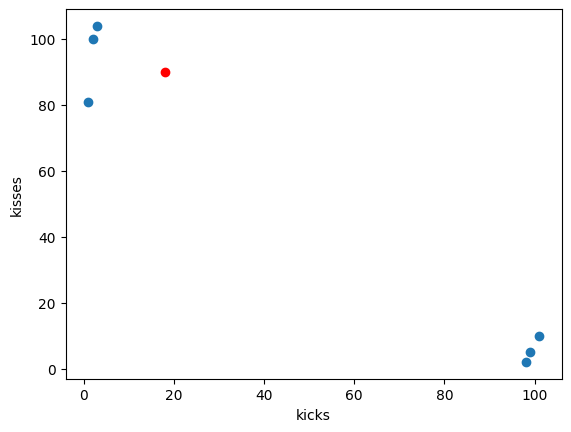

In [2]:
import matplotlib.pyplot as plt

plt.xlabel('kicks')
plt.ylabel('kisses')
plt.scatter(data['kicks'], data['kisses'])
plt.scatter(kicks, kisses, color='r')
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier #sklearn에서 제공하는 KNN 분류 모델
from sklearn import metrics

data['Type of moive'] = data['Type of movie'].astype('category') # action / romance 분류를 카테고리화
model = KNeighborsClassifier(n_neighbors=2) # KNN 모델 생성 negighbors은 2개로
model.fit(data[['kicks', 'kisses']].values, data['Type of movie']) # kicks, kisses 데이터와 결과의 영화 타입으로 model을 fit -> 학습

model.predict([[kicks, kisses]]) # 기존에 입력해두었던 18 / 90 의 데이터로 예측

array(['Romance'], dtype=object)

In [4]:
from sklearn.datasets import load_wine # sklearn 자체에 내장된 와인 관련 데이터셋

wine = load_wine()
print(wine.DESCR)
print(type(wine.data))

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [5]:
import numpy as np

wine_feature = wine.data # 로드한 와인 데이터셋에서 feature 뽑기
wine_label = wine.target # 로드한 와인 데이터셋에서 target 뽑기

print(wine_feature)
print(wine_label)

wineData = pd.DataFrame(data=wine_feature, columns=[wine.feature_names]) # DataFrame 생성
wineData['label'] = wine_label # 'label' columns 생성해서 target 값 넣기

print(wineData)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    alcohol malic_acid   ash alcalinity_of_ash magnesium total_phenols  \
0     14.23       1.71  2.43              15.6     127.0          2.80   
1     13.20       1.78  2.14              11.2     100.0          2.65   
2     13

In [6]:
from sklearn.model_selection import train_test_split

# 카테고리화한 label을 int 형으로 변경
wineData = wineData.astype({'label':'int'})
# train, test 데이터셋 분리
train, test = train_test_split(wineData, test_size=0.3, random_state=0, stratify=wineData['label'])

# label을 제외한 13번째 columns 까지 feature로
trainX = train[train.columns[:13]]
trainY = train['label']

testX = test[test.columns[:13]]
testY = test['label']

print(testX.head(10))
print(testY.shape)

    alcohol malic_acid   ash alcalinity_of_ash magnesium total_phenols  \
53    13.77       1.90  2.68              17.1     115.0          3.00   
64    12.17       1.45  2.53              19.0     104.0          1.89   
6     14.39       1.87  2.45              14.6      96.0          2.50   
1     13.20       1.78  2.14              11.2     100.0          2.65   
98    12.37       1.07  2.10              18.5      88.0          3.52   
157   12.45       3.03  2.64              27.0      97.0          1.90   
77    11.84       2.89  2.23              18.0     112.0          1.72   
166   13.45       3.70  2.60              23.0     111.0          1.70   
54    13.74       1.67  2.25              16.4     118.0          2.60   
148   13.32       3.24  2.38              21.5      92.0          1.93   

    flavanoids nonflavanoid_phenols proanthocyanins color_intensity   hue  \
53        2.79                 0.39            1.68            6.30  1.13   
64        1.75                 

In [7]:
from sklearn import metrics

print(trainY.shape)

# KNN 모델 & 데이터셋을 통해 fit
model = KNeighborsClassifier(n_neighbors=8)
model.fit(trainX, trainY.values.ravel())

# 모델 점수 확인 방법 2가지
# model. score 사용
print(model.score(testX, testY))

# predict한 값을 통해 sklearn에서 제공하는 metrics 사용해서 accuracy_score 사용
testResult = model.predict(testX)
print(metrics.accuracy_score(testResult, testY))

(124, 1)
0.7037037037037037
0.7037037037037037


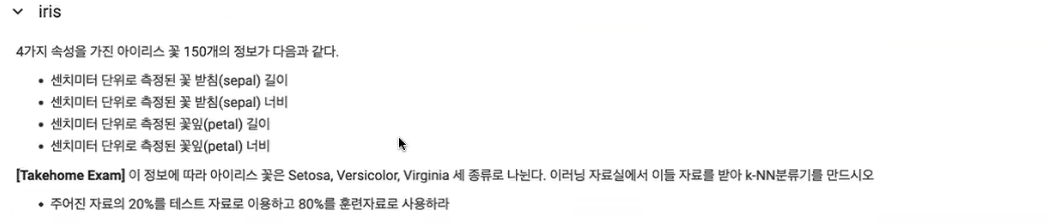

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr